# Types de problemes de classification en ML et en DL



### 1.   Classification binaire: predire si une personne est souffrante d'une maladie cardiaque ou non.
### 2.   Classification multi-classe : predire si une photo est une personne , une nourriture ou un chien par exemple

### 3. Classification Multi-etiquettes: consiste à prédire quelles catégories appartiennnent les articles ou revues de presse (science, mathemeatiques, physiques etc..)



# Workflows

[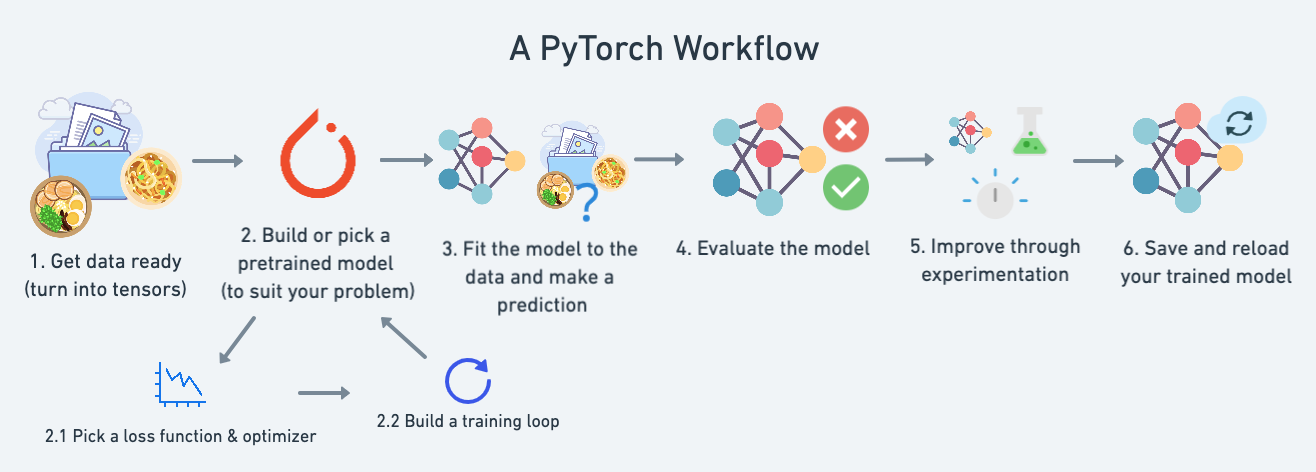texte du lien](https://)

In [1]:
#### Create data for classification and prepairing
import torch
from torch import nn
import torch.nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
### genrerons les données à partir de la librairies scikit learn
from sklearn.datasets import make_circles
n_samples = 2000
X, y   = make_circles(n_samples,
                      noise = 0.03, ### le brruit
                      random_state = 42)

print(X.shape, y.shape)

(2000, 2) (2000,)


In [3]:
##afficher les premieres
X[:5], y[:5]

(array([[ 0.47109875, -0.58158579],
        [-0.61696058,  0.80818956],
        [-0.3999557 ,  0.70796779],
        [ 0.82938523, -0.60057314],
        [-0.16419138,  0.76128858]]),
 array([1, 0, 1, 0, 1]))

In [4]:
### on constate qu'il deux columns(spoile) pour la variable cible y
### mettons les sous formes de datframe
df = pd.DataFrame({"H1": X[:, 0],
                   "H2": X[:, 1],
                   "target": y
                   })
df.head(5)

,H1,H2,target
0,0.471099,-0.581586,1
1,-0.616961,0.808190,0
2,-0.399956,0.707968,1
3,0.829385,-0.600573,0
4,-0.164191,0.761289,1


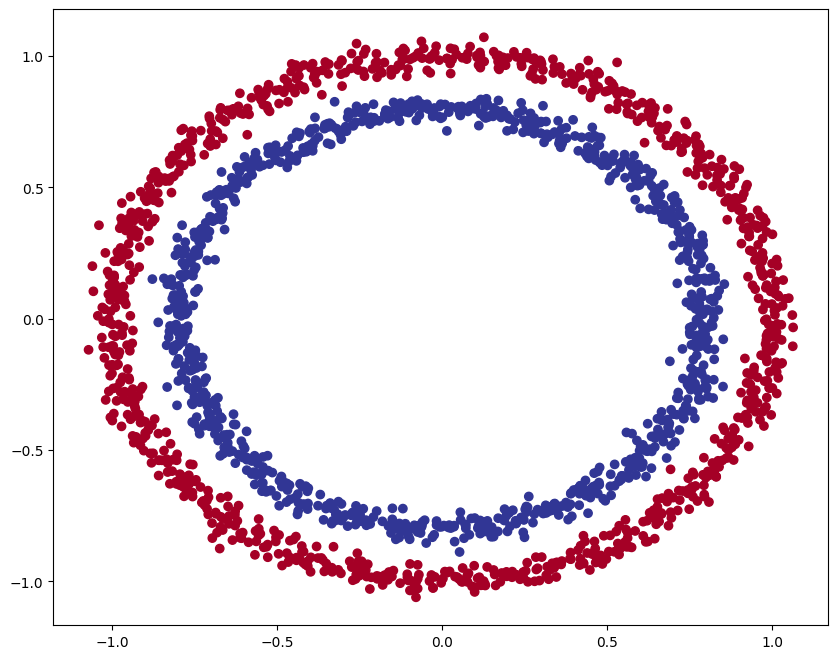

In [5]:
### visualisons, visualisons, visualisons, c'est la devise en datasecience

plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)
plt.show()

In [6]:
df.target.value_counts()

,count
target,
1,1000
0,1000


In [7]:
### deuxieme etape: transformer les données en tensor et diviser le jeu de données
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

print(X.shape, y.shape)

torch.Size([2000, 2]) torch.Size([2000])


In [8]:
X.ndim, y.ndim

(2, 1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 2]),
 torch.Size([400, 2]),
 torch.Size([1600]),
 torch.Size([400]))

In [10]:
### configuration de l'appareil pour utiliser soit un gpu ou un cpu

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [11]:
### building the model for classification
class ClassifyModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
      return self.layer_2(self.layer_1(x))

In [12]:
modelv1 = ClassifyModelV1().to(device)
modelv1

ClassifyModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [13]:
##" ou plus simplement vous pouvez utiliser nn.Sequential(les couches )"
model0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)
model0.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
### voyon ce qui se passe quand on fait passer nos données
predicted = model0(X_test.to(device))

print(X_test.shape, predicted.shape)


torch.Size([400, 2]) torch.Size([400, 1])


In [15]:
predicted[:5], y_test[:5]

(tensor([[-0.3041],
         [-0.1984],
         [-0.2251],
         [-0.1203],
         [-0.4816]], grad_fn=<SliceBackward0>),
 tensor([1., 1., 0., 1., 0.]))

In [16]:
modelv1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.6127,  0.6643],
                      [ 0.1532,  0.1659],
                      [ 0.0225, -0.3914],
                      [ 0.0257,  0.5792],
                      [ 0.0757,  0.0465]])),
             ('layer_1.bias',
              tensor([ 0.3678,  0.4337, -0.6014, -0.5331,  0.5400])),
             ('layer_2.weight',
              tensor([[ 0.3268, -0.3940, -0.3396,  0.3266,  0.0558]])),
             ('layer_2.bias', tensor([0.2325]))])

In [17]:
predict = modelv1(X_test.to(device))
predict[:5], y_test[:5]

(tensor([[ 0.3772],
         [ 0.1643],
         [ 0.2949],
         [-0.1864],
         [ 0.2719]], grad_fn=<SliceBackward0>),
 tensor([1., 1., 0., 1., 0.]))

In [33]:
### fonction de perte et d'optimisation

## perte Loss
loss = nn.BCEWithLogitsLoss() ### focntion sigmoid intégré

## optimiser
optimizer = torch.optim.SGD(params = modelv1.parameters(), lr = 0.1)

In [34]:
### il est important de mesurer la precision pour savoir à quel point notre modele predire exactement

def accuracy(y_true, pred):
  correct = torch.eq(y_true, pred).sum().item()
  precision = (correct *100)/ pred.shape[0]
  return precision


In [35]:
### comparons les données predites passon la méthode forward sans la fonction sigmoide et avec la focntion sigmoide
### sans sigmoide
y_logits = modelv1(X_test.to(device)) [:5]
y_logits

## y_pred = torch.round(torch.sigmoid(modelv1(X_test.to(device))))

tensor([[ 0.3571],
        [ 0.1482],
        [ 0.2763],
        [-0.1959],
        [ 0.2537]], grad_fn=<SliceBackward0>)

In [21]:
### pour obtenir les données brutes on utilise la fonction d'activation sigmoide

y_preds = torch.sigmoid(y_logits)
y_preds

tensor([[0.5932],
        [0.5410],
        [0.5732],
        [0.4535],
        [0.5676]], grad_fn=<SigmoidBackward0>)

In [36]:
### arrondir les valeurs de prediction
y_pred_log= torch.round(y_preds)[:5]

y_pred_label = torch.round(torch.sigmoid(modelv1(X_test.to(device))))[:5]

### verifie l'egalite

print(y_pred_label.squeeze(),  y_pred_log.squeeze())

tensor([1., 1., 1., 0., 1.], grad_fn=<SqueezeBackward0>) tensor([1., 1., 1., 0., 1.], grad_fn=<SqueezeBackward0>)


In [38]:
### boucle d'entrainement du model
torch.manual_seed(42)
epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
epochs_count = []
training_loss = []
testing_loss = []
for epoch in range(epochs):
  ##entrainement du model
  modelv1.train()
  pred_train = modelv1(X_train)


  y_logits = modelv1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(modelv1(X_train).squeeze()))
 ## fonction de perte
  loss_fn = loss(y_logits, y_train)
  precision = accuracy(y_train, y_pred)

  optimizer.zero_grad()
  loss_fn.backward()
  optimizer.step()
  modelv1.eval()
  with torch.inference_mode():
    test_logits = modelv1(X_test).squeeze()
    pred_test = torch.round(torch.sigmoid(test_logits))

    ## loss sur le test et sur la pred
    test_loss = loss(test_logits, y_test)
    test_precision = accuracy(y_test, pred_test)

    if epoch %10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss.item():.5f}, Accuracy: {precision:.2f}% | Test loss: {test_loss.item():.5f}, Test acc: {test_precision:.2f}%")


AttributeError: 'BCEWithLogitsLoss' object has no attribute 'item'

In [24]:
### resoudre le problème de sous ou sur apprentissage
## ajouter des couches cachées , augmenter la learning rate et autres

class ClassifyModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [25]:
model2 = ClassifyModelV2()
model2.to(device)
device

'cpu'

In [26]:
### fonction otimiser et loss
perte = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr = 0.1)

In [31]:
### training and testing loop

epochs = 200
for epoch in range(epochs):
  model2.train()

  ypred_train = model2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(model2(X_train).squeeze()))


  ## loss et optimizer
  loss = perte(ypred_train, y_train)
  precision = accuracy(y_train, y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model2.eval()

  ### predictions
  with torch.inference_mode():
    ypred_test = model2(X_test).squeeze()
    y_pred = torch.round(torch.sigmoid(model2(X_test).squeeze()))

    test_loss = perte(ypred_test, y_test)
    test_precision = accuracy(y_test, y_pred)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {precision:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_precision:.2f}%")


Epoch: 0 | Loss: 0.69313, Accuracy: 44.94% | Test loss: 0.69329, Test acc: 44.25%
Epoch: 10 | Loss: 0.69313, Accuracy: 45.69% | Test loss: 0.69329, Test acc: 44.75%
Epoch: 20 | Loss: 0.69313, Accuracy: 46.12% | Test loss: 0.69330, Test acc: 44.50%
Epoch: 30 | Loss: 0.69313, Accuracy: 46.69% | Test loss: 0.69330, Test acc: 44.00%
Epoch: 40 | Loss: 0.69313, Accuracy: 46.69% | Test loss: 0.69330, Test acc: 44.50%
Epoch: 50 | Loss: 0.69313, Accuracy: 47.00% | Test loss: 0.69330, Test acc: 45.25%
Epoch: 60 | Loss: 0.69313, Accuracy: 47.12% | Test loss: 0.69331, Test acc: 44.75%
Epoch: 70 | Loss: 0.69313, Accuracy: 47.06% | Test loss: 0.69331, Test acc: 44.75%
Epoch: 80 | Loss: 0.69313, Accuracy: 46.94% | Test loss: 0.69331, Test acc: 45.25%
Epoch: 90 | Loss: 0.69313, Accuracy: 47.25% | Test loss: 0.69331, Test acc: 45.50%
Epoch: 100 | Loss: 0.69313, Accuracy: 47.31% | Test loss: 0.69331, Test acc: 45.25%
Epoch: 110 | Loss: 0.69313, Accuracy: 47.56% | Test loss: 0.69332, Test acc: 45.25%
Epo

In [39]:
### Examinons un peu l'histoire de non Linearité des données avec la fonction relu
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 2]),
 torch.Size([400, 2]),
 torch.Size([1600]),
 torch.Size([400]))

In [40]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=5000,
                    noise=0.03,
                    random_state=42)
print(X.shape, y.shape)

(5000, 2) (5000,)


In [41]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((4000, 2), (1000, 2), (4000,), (1000,))

In [42]:
### transformer les données en tenseur
Xtrain = torch.from_numpy(Xtrain).type(torch.float32)
Xtest = torch.from_numpy(Xtest).type(torch.float32)
ytrain = torch.from_numpy(ytrain).type(torch.float32)
ytest = torch.from_numpy(ytest).type(torch.float32)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape


(torch.Size([4000, 2]),
 torch.Size([1000, 2]),
 torch.Size([4000]),
 torch.Size([1000]))

In [46]:
class ModelRelu(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [47]:
model = ModelRelu()
model.to(device)

ModelRelu(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [48]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310

In [49]:
function_loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [54]:
### building the model and training and testion loop
torch.manual_seed(80)
epochs = 2000
Xtrain = Xtrain.to(device)
Xtest = Xtest.to(device)
ytrain = ytrain.to(device)
ytest = ytest.to(device)


for epoch in range(epochs):
  model.train()
  ### perte sur training
  y_logits = model(Xtrain).squeeze()

  pred_train = torch.round(torch.sigmoid(model(Xtrain).squeeze()))

  ### definir la function de perte
  loss = function_loss(y_logits, ytrain)
  acc = accuracy(ytrain, pred_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()

  with  torch.inference_mode():
    ### testting
    test_logits = model(Xtest).squeeze()
    pred_test = torch.round(torch.sigmoid(model(Xtest).squeeze()))

###founction de perte  de accuracy
    test_loss = function_loss(test_logits, ytest)
    test_acc = accuracy(ytest, pred_test)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.11423, Accuracy: 99.67% | Test loss: 0.12216, Test acc: 99.70%
Epoch: 100 | Loss: 0.08819, Accuracy: 99.75% | Test loss: 0.09417, Test acc: 99.60%
Epoch: 200 | Loss: 0.07137, Accuracy: 99.75% | Test loss: 0.07614, Test acc: 99.60%
Epoch: 300 | Loss: 0.05980, Accuracy: 99.72% | Test loss: 0.06381, Test acc: 99.70%
Epoch: 400 | Loss: 0.05153, Accuracy: 99.70% | Test loss: 0.05495, Test acc: 99.70%
Epoch: 500 | Loss: 0.04537, Accuracy: 99.72% | Test loss: 0.04827, Test acc: 99.70%
Epoch: 600 | Loss: 0.04061, Accuracy: 99.78% | Test loss: 0.04311, Test acc: 99.70%
Epoch: 700 | Loss: 0.03683, Accuracy: 99.78% | Test loss: 0.03905, Test acc: 99.70%
Epoch: 800 | Loss: 0.03377, Accuracy: 99.78% | Test loss: 0.03575, Test acc: 99.70%
Epoch: 900 | Loss: 0.03125, Accuracy: 99.78% | Test loss: 0.03306, Test acc: 99.70%
Epoch: 1000 | Loss: 0.02913, Accuracy: 99.78% | Test loss: 0.03080, Test acc: 99.80%
Epoch: 1100 | Loss: 0.02733, Accuracy: 99.80% | Test loss: 0.02889, Test acc:

In [56]:
### predictions

model.eval()
with torch.inference_mode():
  y_logits = model(Xtest).squeeze()
  pred_test = torch.round(torch.sigmoid(model(Xtest).squeeze()))
  print(pred_test[:10], y[:10])

tensor([0., 0., 0., 1., 1., 0., 1., 1., 0., 1.]) [0 1 1 0 0 0 0 0 0 0]


# Problème de classification Multiclasses(plus d'etiquettes que 2)

In [57]:
### création des données mutli etiquettes

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 10000,
                  n_features = 2,
                  centers = 4,
                  cluster_std = 1.5,
                  random_state = 42)

print(X.shape, y.shape)

(10000, 2) (10000,)


In [58]:
### transformer les données en tenseurs

X = torch.from_numpy(X).type(torch.float32)
y  = torch.from_numpy(y).type(torch.LongTensor)

X.shape, y.shape

(torch.Size([10000, 2]), torch.Size([10000]))

In [59]:
### splitting the data
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2,
                                                random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

(torch.Size([8000, 2]),
 torch.Size([2000, 2]),
 torch.Size([8000]),
 torch.Size([2000]))

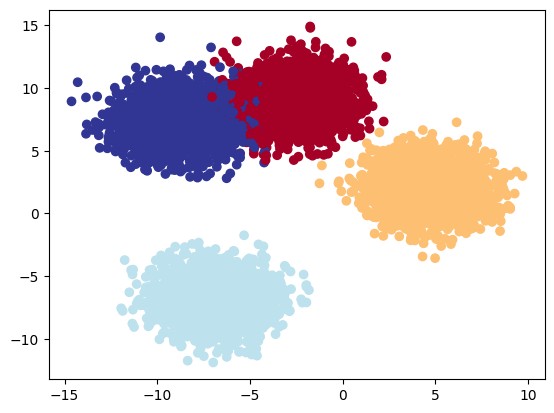

In [61]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [65]:
### building the model

class ModelMulti(nn.Module):
  def __init__(self, input_features, out_features, hidden_units = 8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = out_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x
    )

In [66]:
model = ModelMulti(2, 10)
model.to(device), model.parameters()

(ModelMulti(
   (linear_layer_stack): Sequential(
     (0): Linear(in_features=2, out_features=8, bias=True)
     (1): ReLU()
     (2): Linear(in_features=8, out_features=8, bias=True)
     (3): ReLU()
     (4): Linear(in_features=8, out_features=10, bias=True)
   )
 ),
 <generator object Module.parameters at 0x7ddf29610660>)

In [68]:
model(xtrain.to(device)).shape

torch.Size([8000, 10])

In [69]:
function_loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [71]:
### training and testing loop

torch.manual_seed(42)
epochs = 1000
xtrain , ytrain = xtrain.to(device), ytrain.to(device)
xtest, ytest = xtest.to(device), ytest.to(device)

for epoch in range(epochs):
  model.train()

  ### prediction sur training
  y_logits = model(xtrain)
  pred_train = torch.softmax(model(xtrain), dim = 1).argmax(dim = 1)

  ## perte sur training et accuracy

  loss = function_loss(y_logits, ytrain)
  acc = accuracy(ytrain, pred_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_logits = model(xtest)
    pred_test = torch.softmax(model(xtest), dim = 1).argmax(dim = 1)

    ### prediction sur le test et accuracy
    test_loss = function_loss(test_logits, ytest)
    test_acc = accuracy(ytest, pred_test)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.34466, Accuracy: 0.00% | Test loss: 2.10859, Test acc: 20.85%
Epoch: 100 | Loss: 0.03594, Accuracy: 99.04% | Test loss: 0.04292, Test acc: 98.60%
Epoch: 200 | Loss: 0.02980, Accuracy: 99.05% | Test loss: 0.03788, Test acc: 98.65%
Epoch: 300 | Loss: 0.02805, Accuracy: 99.08% | Test loss: 0.03658, Test acc: 98.70%
Epoch: 400 | Loss: 0.02717, Accuracy: 99.08% | Test loss: 0.03592, Test acc: 98.65%
Epoch: 500 | Loss: 0.02659, Accuracy: 99.08% | Test loss: 0.03545, Test acc: 98.65%
Epoch: 600 | Loss: 0.02615, Accuracy: 99.09% | Test loss: 0.03507, Test acc: 98.70%
Epoch: 700 | Loss: 0.02579, Accuracy: 99.09% | Test loss: 0.03473, Test acc: 98.70%
Epoch: 800 | Loss: 0.02548, Accuracy: 99.09% | Test loss: 0.03443, Test acc: 98.70%
Epoch: 900 | Loss: 0.02521, Accuracy: 99.11% | Test loss: 0.03414, Test acc: 98.70%


In [72]:
model.eval()

with torch.inference_mode():
  test_logits = model(xtest)
  pred_test = torch.softmax(model(xtest), dim = 1).argmax(dim = 1)
print(pred_test[:10], y[:10])



tensor([1, 1, 1, 2, 3, 1, 3, 1, 1, 1]) tensor([0, 2, 1, 2, 2, 1, 0, 0, 3, 2])
